In [9]:
import sqlite3

# Create a connection to student_grades.db
connection = sqlite3.connect('student_grades.db')

# Create a cursor object
cursor = connection.cursor()

IntegrityError: UNIQUE constraint failed: students.student_id

In [ ]:
# Create students table for student information
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

# Create grades table for student grades for different subjects
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER, 
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

# Sample data for students table
students_data = [
    (1, "Alice", "Johnson"),
    (2, "Bob", "Smith"),
    (3, "Carol", "White"),
    (4, "David", "Brown"),
    (5, "Eve", "Davis")
]

# Sample data for grades table
grades_data = [
    (1, 1, "Math", 95),
    (2, 1, "English", 88),
    (3, 1, "History", 90),
    (4, 2, "Math", 82),
    (5, 2, "English", 76),
    (6, 2, "History", 85),
    (7, 3, "Math", 64),
    (8, 3, "English", 98),
    (9, 3, "History", 96),
    (10, 4, "Math", 77),
    (11, 4, "English", 59),
    (12, 4, "History", 61),
    (13, 5, "Math", 97),
    (14, 5, "English", 100),
    (15, 5, "History", 98)
]

# Insert data into the tables
cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', students_data)
cursor.executemany('''
INSERT INTO grades (grade_id, student_id, subject, grade) VALUES (?, ?, ?, ?)
''', grades_data)
connection.commit()

In [10]:
# Retrieve all students' names and their grades from joined table
cursor.execute('''
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
''')

joined_data = cursor.fetchall()

print("All students' names and grades:")
for row in joined_data:
    print(row)

All students' names and grades:
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 64)
('Carol', 'White', 'English', 98)
('Carol', 'White', 'History', 96)
('David', 'Brown', 'Math', 77)
('David', 'Brown', 'English', 59)
('David', 'Brown', 'History', 61)
('Eve', 'Davis', 'Math', 97)
('Eve', 'Davis', 'English', 100)
('Eve', 'Davis', 'History', 98)


In [33]:
# Find average grade for each student
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grade)
FROM grades
JOIN students ON students.student_id = grades.student_id
GROUP BY students.student_id
''')
average_grade = cursor.fetchall()

print(f"Average grade per student:")
for row in average_grade:
    print(row)

Average grade per student:
('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 86.0)
('David', 'Brown', 65.66666666666667)
('Eve', 'Davis', 98.33333333333333)


In [38]:
# Student with highest average grade
cursor.execute('''
SELECT students.first_name, students.last_name, AVG(grade) AS avg_grade
FROM grades
JOIN students ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY avg_grade DESC
LIMIT 1
''')
highest_average_grade = cursor.fetchall()[0]

print(f"Student with highest average grade: {highest_average_grade}")

Student with highest average grade: ('Eve', 'Davis', 98.33333333333333)


In [42]:
# Average math grade
cursor.execute('''
SELECT AVG(grade) AS avg_grade
FROM grades
WHERE subject = "Math"
''')
avg_math_grade = cursor.fetchone()[0]

print(f"Average math grade: {avg_math_grade}")

Average math grade: 83.0


In [48]:
# All students who scored above 90 in any subject
cursor.execute('''
SELECT DISTINCT students.first_name, students.last_name
FROM grades
JOIN students ON students.student_id = grades.student_id
WHERE grade > 90
''')
above90 = cursor.fetchall()

print(f"All students above 90 in a subject: {above90}")

All students above 90 in a subject: [('Alice', 'Johnson'), ('Carol', 'White'), ('Eve', 'Davis')]


In [57]:
import pandas as pd

# Query the students and grades data into a DataFrame using pandas
students_df = pd.read_sql_query('SELECT * FROM students', connection)
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)



,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [61]:
# Join query to combine data from both tables
cursor.execute('''
SELECT students.student_id, students.first_name, students.last_name, grades.grade_id, grades.subject, grades.grade
FROM grades
JOIN students ON students.student_id = grades.student_id
''')
combined_df = cursor.fetchall()

for row in combined_df:
    print(row)
    
# single dataframe
combined_df = pd.merge(grades_df, students_df, on = "student_id")

combined_df

(1, 'Alice', 'Johnson', 1, 'Math', 95)
(1, 'Alice', 'Johnson', 2, 'English', 88)
(1, 'Alice', 'Johnson', 3, 'History', 90)
(2, 'Bob', 'Smith', 4, 'Math', 82)
(2, 'Bob', 'Smith', 5, 'English', 76)
(2, 'Bob', 'Smith', 6, 'History', 85)
(3, 'Carol', 'White', 7, 'Math', 64)
(3, 'Carol', 'White', 8, 'English', 98)
(3, 'Carol', 'White', 9, 'History', 96)
(4, 'David', 'Brown', 10, 'Math', 77)
(4, 'David', 'Brown', 11, 'English', 59)
(4, 'David', 'Brown', 12, 'History', 61)
(5, 'Eve', 'Davis', 13, 'Math', 97)
(5, 'Eve', 'Davis', 14, 'English', 100)
(5, 'Eve', 'Davis', 15, 'History', 98)


,grade_id,student_id,subject,grade,first_name,last_name
0,1,1,Math,95,Alice,Johnson
1,2,1,English,88,Alice,Johnson
2,3,1,History,90,Alice,Johnson
3,4,2,Math,82,Bob,Smith
4,5,2,English,76,Bob,Smith
5,6,2,History,85,Bob,Smith
6,7,3,Math,64,Carol,White
7,8,3,English,98,Carol,White
8,9,3,History,96,Carol,White
9,10,4,Math,77,David,Brown


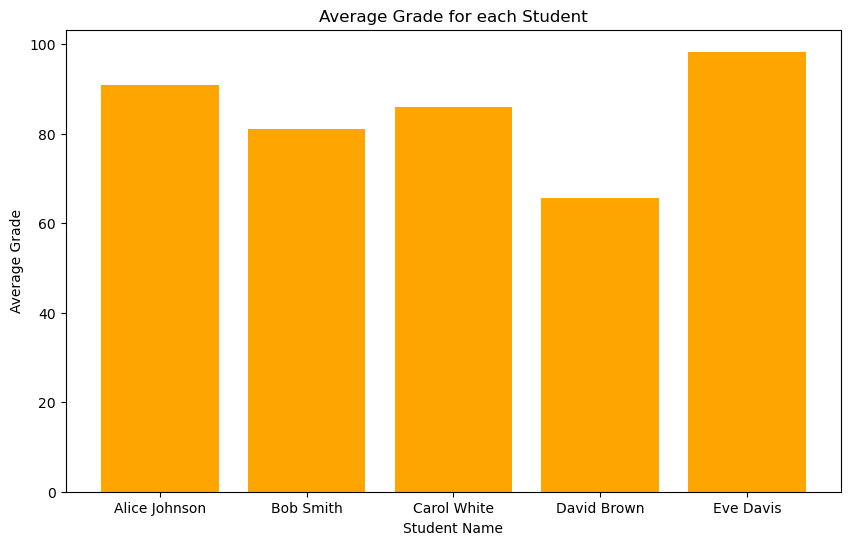

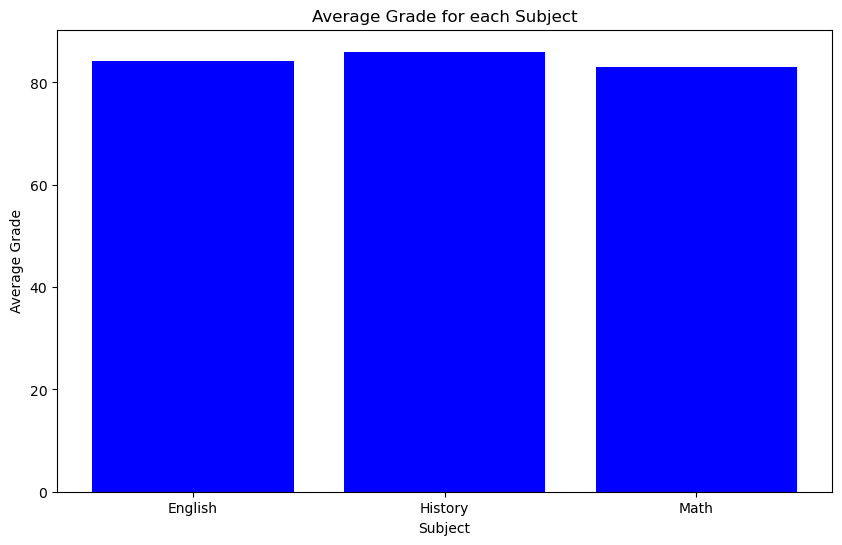

In [109]:
# Visualize data with Matplotlib
import matplotlib.pyplot as plt

combined_df["name"] = combined_df["first_name"]+" "+combined_df["last_name"]
average_grades = combined_df[["name","grade"]]
average_grades = average_grades.groupby("name")["grade"].mean().reset_index()

average_subject = combined_df.groupby("subject")["grade"].mean().reset_index()

# Plot average grades for each student
plt.figure(figsize=(10,6))
plt.bar(average_grades['name'], average_grades['grade'], color='orange')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grade for each Student')
plt.show()

# Plot average grade for each subject
plt.figure(figsize=(10,6))
plt.bar(average_subject['subject'], average_subject['grade'], color='blue')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for each Subject')
plt.show()
